<a href="https://colab.research.google.com/github/Mustaphachigare/MigrationMiner/blob/master/%20projet_python_pour_cnn_avec_mniste_digits_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


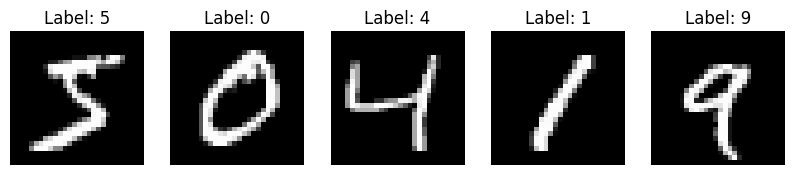

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 104s 243ms/step - accuracy: 0.8617 - loss: 0.4418 - val_accuracy: 0.9835 - val_loss: 0.0561
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 141s 241ms/step - accuracy: 0.9838 - loss: 0.0523 - val_accuracy: 0.9887 - val_loss: 0.0413
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 139s 235ms/step - accuracy: 0.9900 - loss: 0.0325 - val_accuracy: 0.9867 - val_loss: 0.0507
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 99s 235ms/step - accuracy: 0.9921 - loss: 0.0247 - val_accuracy: 0.9872 - val_loss: 0.0424
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 101s 239ms/step - accuracy: 0.9941 - loss: 0.0194 - val_accuracy: 0.9898 - val_loss: 0.0369
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 140s 235ms/step - accuracy: 0.9947 - loss: 0.0151 - val_accuracy: 0.9917 - val_loss: 0.0340
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 100s 238ms/step - accuracy: 0.9964 - loss: 0.0109 - val_accuracy: 0.9898 - val_loss: 0.0409
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 144s 243ms/step - accuracy: 0.9969 - 

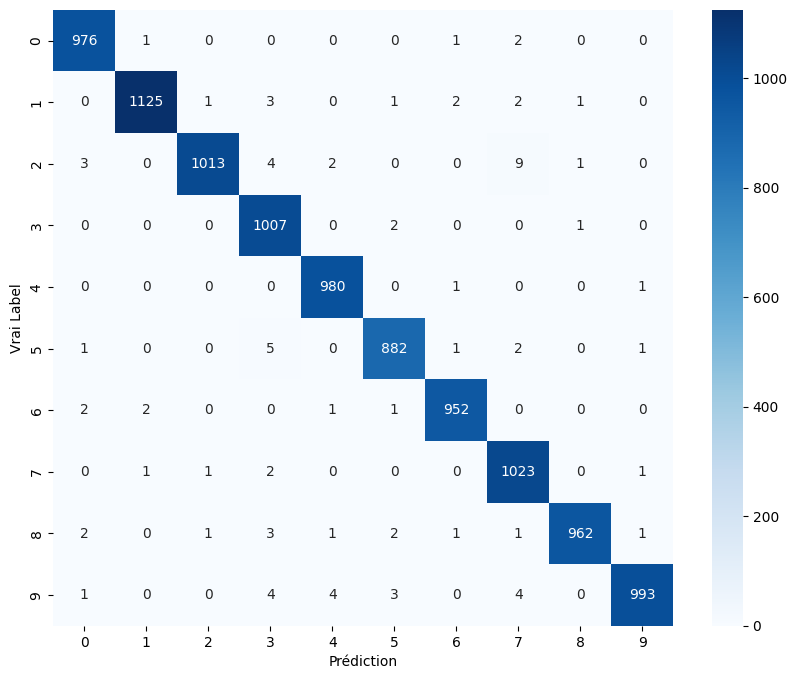

In [ ]:
# Étape 1 : Chargement des bibliothèques
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
import cv2
from google.colab import files

# Étape 2 : Charger le dataset MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Étape 3 : Visualisation
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

# Étape 4 : Pré-traitement
# Normalisation (0-1) et ajout de la dimension de canal (grayscale = 1)
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Étape 5 : Création du modèle CNN
model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    # Bloc 1
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    # Bloc 2
    layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    # Classification
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Étape 6 : Entraînement
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

# Étape 7 : Évaluation et Matrice de Confusion
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédiction')
plt.ylabel('Vrai Label')
plt.show()

# Étape 8 : Sauvegarde
model.save("mnist_model.keras")

# Étape 9 : Tester une image externe (Optionnel - Téléchargement)
# upload = files.upload() # Décommentez pour envoyer votre propre image